In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_recall_curve, accuracy_score, recall_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, cross_val_predict
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import time as tm
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, LogisticRegression
import itertools as it

In [2]:
red_train_x = pd.read_csv('red_train_x.csv')
red_train_y = pd.read_csv('red_train_y.csv')
red_test_x = pd.read_csv('red_test_x.csv')
red_test_y = pd.read_csv('red_test_y.csv')
white_train_x = pd.read_csv('white_train_x.csv')
white_train_y = pd.read_csv('white_train_y.csv')
white_test_x = pd.read_csv('white_test_x.csv')
white_test_y = pd.read_csv('white_test_y.csv')

In [7]:
red = pd.read_csv('winequality-red.csv', delimiter = ';')
white = pd.read_csv('winequality-white.csv', delimiter = ';')

In [80]:
combined = pd.concat([red, white], axis = 0)
combined

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Visualizations start below:

In [111]:
value_counts = red_test_y.value_counts()

In [114]:
value_counts_white = white_test_y.value_counts()

quality
6          550
5          364
7          220
8           44
4           41
3            5
9            1
dtype: int64

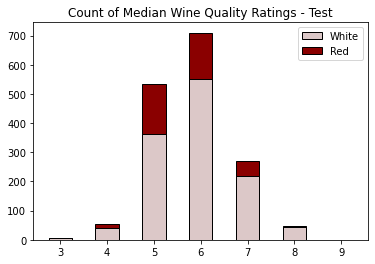

In [113]:
quality = (
3, 4, 5, 6, 7, 8, 9
)
weight_counts = {
    "White": np.array([value_counts_white.iloc[5], value_counts_white.iloc[4], value_counts_white.iloc[1],
                      value_counts_white.iloc[0], value_counts_white.iloc[2], value_counts_white.iloc[3], value_counts_white.iloc[6]]),
        "Red": np.array([value_counts.iloc[5], value_counts.iloc[3], value_counts.iloc[0],
                      value_counts.iloc[1], value_counts.iloc[2], value_counts.iloc[4], 0])
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(quality))

colors = {
    "White": (220/255, 200/255, 200/255),  # RGB values for cream white
    "Red": (0.54, 0.0, 0.0)       # RGB values for dark red
}

for boolean, weight_count in weight_counts.items():
    p = ax.bar(quality, weight_count, width, label=boolean, bottom=bottom, color=colors[boolean], edgecolor='black')
    bottom += weight_count

ax.set_title("Count of Median Wine Quality Ratings - Test")
ax.legend(loc = "upper right")

plt.show()


In [ ]:
plt.savefig("test_response_distribution.png")

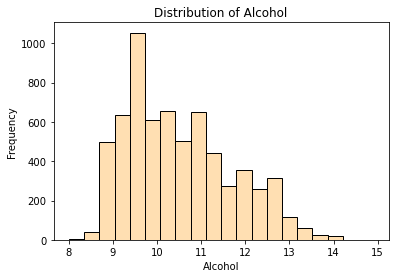

In [103]:

pH_values = combined['alcohol']

# Create a histogram by binning the 'pH' values
plt.hist(pH_values, bins=20, edgecolor='black', color = (255/255, 223/255, 178/255))

# Set labels and title
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol')

# Show the plot
plt.show()

In [104]:
plt.savefig("combined_alcohol_distribution.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
pH_values = red['pH']

# Create a histogram by binning the 'pH' values
plt.hist(pH_values, bins=20, edgecolor='black', color = (255/255, 223/255, 178/255))

# Set labels and title
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title('Distribution of pH')

# Show the plot
plt.show()